In [1]:
random()

0.25803810837711016

In [12]:
sum([randint(0,1) for n in srange(10^5)].count(1) for int in srange(10))

499930

Ahora vamos a generar una moneda trucada:

In [24]:
def moneda_trucada(p):
    x = random()
    if x <= p:
        return 1
    else:
        return 0

In [25]:
moneda_trucada(1/3)

0

In [26]:
[moneda_trucada(1/3) for n in srange(10^5)].count(1)

33278

En la función usamos random(), que devuelve un número racional entre [0,1]. 
Para generar una moneda trucada cuya probabilidad de cara sea de 1/3, lo que hacemos es usar una variable aleatoria que mande todas las caras al espacio entre (0, 1/3), de modo que se x = random() <= 1/3, equivaldría a una cara

## Ejercicio 1

### 1.1

In [27]:
def moneda_trucada(k):
    x = random()
    if x <= k/10:
        return 1
    else:
        return 0

In [28]:
[moneda_trucada(1) for n in srange(10^3)].count(1)

94

In [29]:
def probabilidad(k):
    return [moneda_trucada(k) for n in srange(10^3)].count(1)

In [98]:
L = []
for k in srange(1,10):
    L.append((sum([probabilidad(k) for n in srange(100)])/10^5).n())
    
L

[0.100130000000000,
 0.201290000000000,
 0.297970000000000,
 0.397750000000000,
 0.498690000000000,
 0.599760000000000,
 0.697500000000000,
 0.799460000000000,
 0.900470000000000]

In [99]:
media = (sum([k*L[k] for k in srange(len(L))])).n();media

23.9690200000000

In [103]:
media = (sum(L[k] for k in srange(len(L)))/len(L)).n(); media

0.499224444444444

### 1.2

In [60]:
def aleatnum(a,b):
    x = random()
    return x*(b-a) + a

In [63]:
L = []
for x in [aleatnum(4,7) for n in srange(100)]:
    if x < 4 or x > 7:
        L.append('false')
    else:
        L.append('true')

In [64]:
all(L)

True

### 1.3

In [ ]:
def moneda_trucada(k):
    x = random()
    if x <= k/10:
        return 1
    else:
        return 0

In [81]:
def ruina(k, numit):
    saldo = 100
    it = 0
    while saldo > 0 and it < numit:
        if moneda_trucada(k) == 1:
            saldo = saldo + 1
        else:
            saldo = saldo - 1
        it = it + 1
    return saldo

In [140]:
L = []
for k in srange(1,10):
    L.append(sum([ruina(k, 10^3) for n in srange(10^3)]))

## Generación eficiente de números aleatorios

In [6]:
def lcg(modulus, a, c, seed=None):
    if seed != None:
        lcg.previous = seed
    random_number = (lcg.previous * a + c) % modulus
    lcg.previous = random_number
    return random_number
lcg.previous = 2222

Ejemplo con casos de wikipedia

In [7]:
float((lcg(2^32, 1664525, 1013904223) / 2^32) * 5 + 5)

5.486047329613939

In [8]:
def randomef(a,b):
    dif = b - a
    return floor((lcg(2^32, 1664525, 1013904223) / 2^32) * dif + a)

In [9]:
L = [randomef(10, 20) for n in srange(100)]

Ahora vamos a reflejar la equiprobabilidad del método de generación en una gráfica usando bar_chart

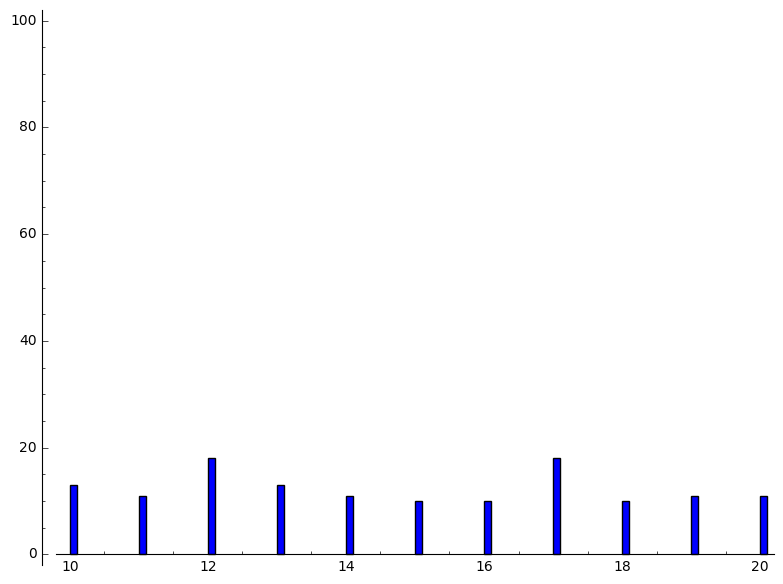

In [10]:
bar_chart(L,width=0.1).show(xmin=10,xmax=20,ymin=0,ymax=100)

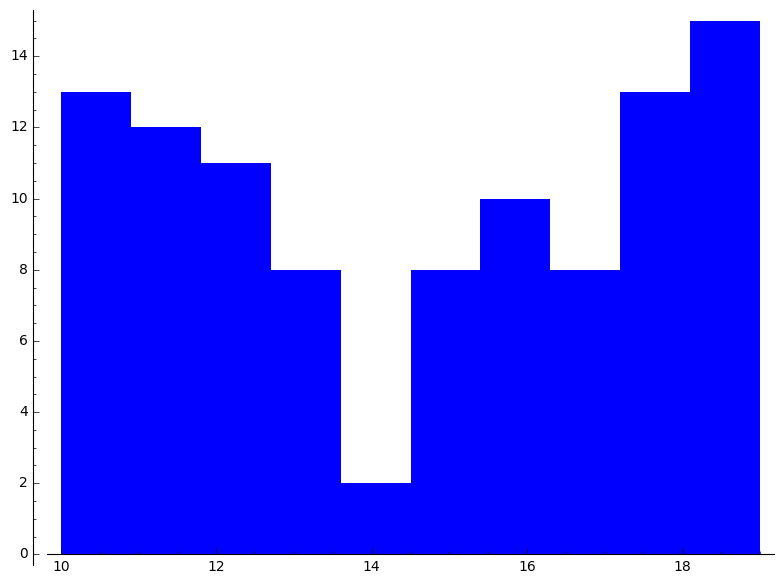

In [16]:
T = stats.TimeSeries(L)
T.plot_histogram(bins = 10, normalize = false)

## Cálculo de pi

In [50]:
def prueba(N):
    L = [0 for i in srange(0, 100)]
    for x in srange(1,N):
        a = random()
        b = floor(100 * a)
        L[b] = L[b] + 1
    bar_chart(L,width=0.1).show(xmin=0,xmax=9,ymin=0,ymax=5000)
    return L

In [55]:
for N in srange(10, 10^7, *10)
M = prueba(10^5)
sum(((x - N/100)^2) for x in M)

SyntaxError: invalid syntax (<ipython-input-55-e9b63fbd7f47>, line 1)

In [18]:
def aleat(N):
    L = []
    for x in srange(0,N):
        L.append((random(), random()))
    return L

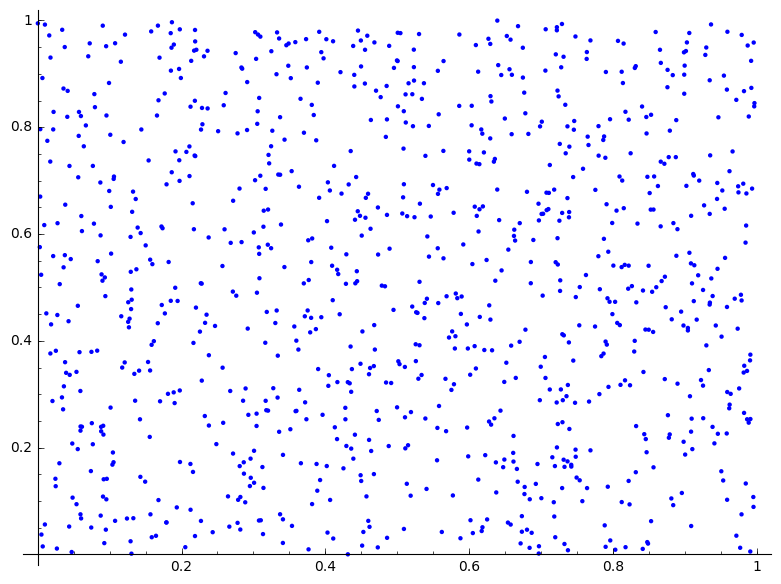

In [28]:
(points(aleat(1000))).show(xmin=0, xmax=1)

# Sombreros 5.2


In [79]:
def sombreros(N, veces):
    total = 0
    for v in srange(0, veces):
        prob = 0
        for persona in srange(0, N):
            if randint(1, N - persona) != persona:
                prob = prob + 1
            else:
                prob = 0
                break
        total = total + prob/N
    return (total/veces).n()

In [82]:
sombreros(30, 10^5)

0.482150000000000